# Fish species predictor

## 1- Importing the liberires and the data

In [ ]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [ ]:
data_path = '../input/fish-market/Fish.csv'
data = pd.read_csv(data_path)

## 2- Exploring the data

In [ ]:
print(data.head())

In [ ]:
print(data.Species.unique())

#### We have 7 features at all 
#### One of the features is Species which we want to use it the as output we have 6 different classes

**['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']**

In [ ]:
print(data.isnull().sum())

### We have no missing data

In [ ]:
print(data.describe().transpose())

### Weight have a big STD for this we will normalize it later 

## 3- Data Preprocessing

#### 3.1- Normalizing the data: first lets drop categorical feature

In [ ]:
Y = data['Species']
data = data.drop(['Species'], axis=1)


In [ ]:
names= data.columns

In [ ]:
from sklearn.preprocessing import Normalizer

In [ ]:
norms= Normalizer().fit(data)
data_norms=norms.transform(data)
data_norms= np.asarray(data_norms)

In [ ]:
nomred_data = pd.DataFrame(data_norms)

In [ ]:
nomred_data

In [ ]:
nomred_data.columns =names

In [ ]:
print(nomred_data)

#### 3.2- Categorical to numerical

In [ ]:
Y= Y.replace({"Bream": 0, "Roach": 1,
              "Whitefish":2, "Parkki":3, 
              "Perch":4, "Pike":5, "Smelt":6})

In [ ]:
print(Y.unique())

#### 3.3- Compain all the data togather for visualization

In [ ]:
data_prepared = pd.concat([nomred_data,Y], axis=1)

In [ ]:
data_prepared

#### Now the data is normalized and numerical so its ready to make some visualization
<img src="https://media.makeameme.org/created/wohooo-0392028a2b.jpg">

## 4- Data Visualization

In [ ]:
data_prepared.hist()

In [ ]:
sns.pairplot(data_prepared)

#### 4.1- Find the Outliers

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Width'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Width'])

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Height'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Height'])

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Length1'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Length1'])

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Length2'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Length2'])

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Length3'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Length3'])

In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Width'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Width'])

#### By lookint to the plotting we can see that there is 3 Outliers Let's drop them!!!

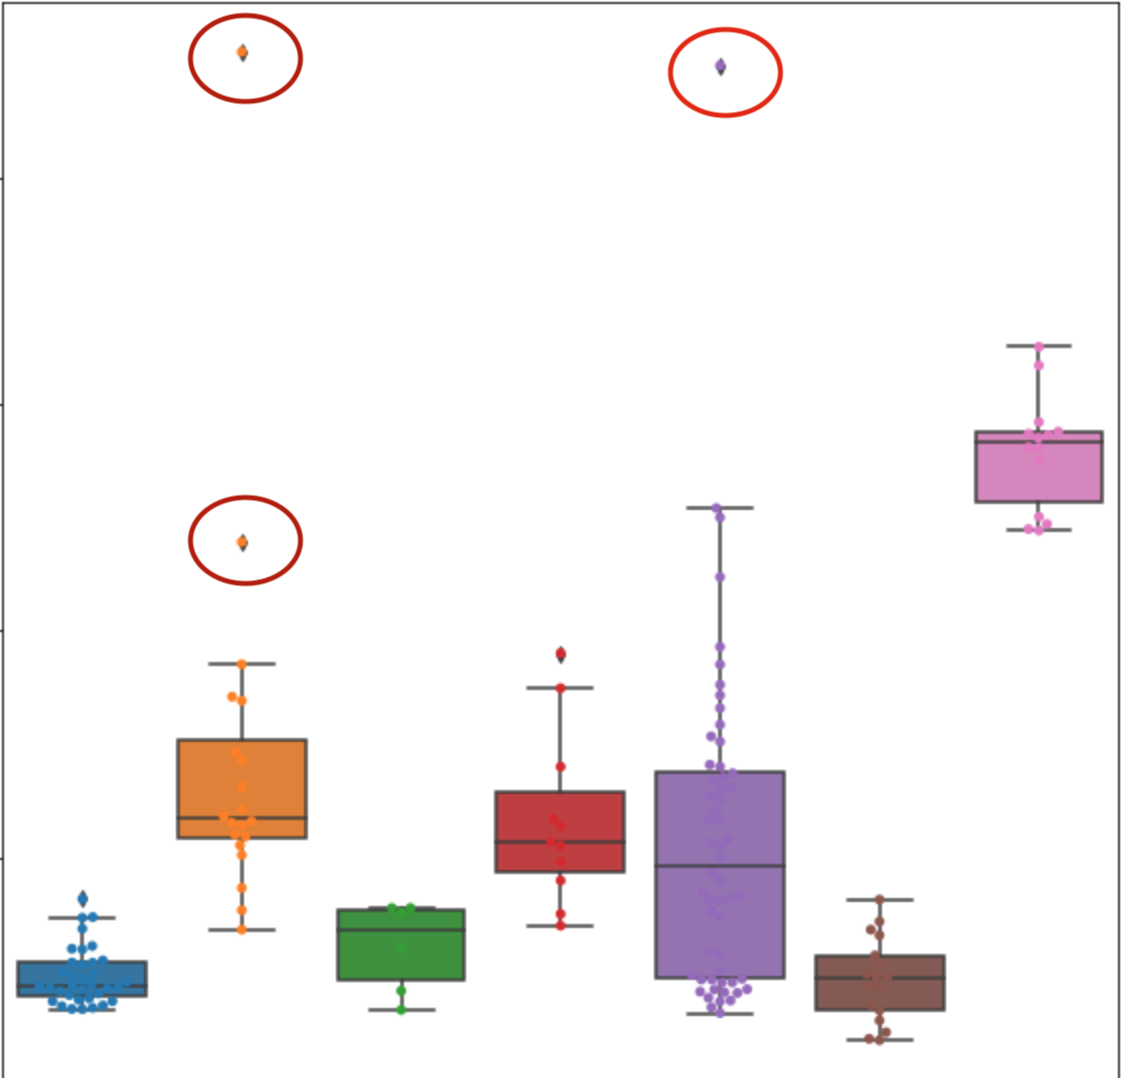

#### 4.2- Droping outliers

In [ ]:
print(data_prepared['Width'].max())

#### 4.2.1- Get the index of the outlier and drop

In [ ]:
data_4_cat= data_prepared.loc[data_prepared.Species==4]
print(data_4_cat['Width'].idxmax())
indx_to_drop = data_4_cat['Width'].idxmax()
data_prepared =data_prepared.drop([indx_to_drop], axis=0)

data_1_cat= data_prepared.loc[data_prepared.Species==1]
print(data_1_cat['Width'].idxmax())
indx_to_drop = data_1_cat['Width'].idxmax()
data_prepared =data_prepared.drop([indx_to_drop], axis=0)

data_1_cat= data_prepared.loc[data_prepared.Species==1]
print(data_1_cat['Width'].idxmax())
indx_to_drop = data_1_cat['Width'].idxmax()
data_prepared =data_prepared.drop([indx_to_drop], axis=0)


In [ ]:
plt.figure(figsize=(10,10))
sns.boxplot(x= data_prepared['Species'], y= data_prepared['Width'])
sns.swarmplot(x= data_prepared['Species'], y= data_prepared['Width'])

#### We don't have Outlierssssss  🥳🥳🥳🥳🥳

<img src="https://i2.wp.com/novocom.top/image/bWVkalwaHkWEuZ2lwaHkuY29t/media/3o6ZsXoYhtUlGEyIRa/giphy.gif">

## 5- Preparing the model and the data for training

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

In [ ]:
SVC = SVC()

In [ ]:
parameters = {'C': [10,100,1000], 'gamma': [4,5,6,7],
              'kernel': ['rbf', 'poly', 'sigmoid']}
grid_search = GridSearchCV(SVC, parameters, n_jobs=20, cv=6, refit=True,verbose=10)


In [ ]:
Y = data_prepared['Species']
X= data_prepared.drop(['Species'], axis=1)

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=40, test_size=0.3)

In [ ]:
grid_search.fit(X_train, Y_train)

In [ ]:
print("Best parameters for SVC Clasiifier",grid_search.best_estimator_)

## 6- Evaluate the model

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
preds = grid_search.predict(X_test)

In [ ]:
score= accuracy_score(Y_test, preds)
print("_Accuracy = %",score*100)

# The End....

<img src="https://giffiles.alphacoders.com/105/105882.gif">